<a href="https://colab.research.google.com/github/heoni00/Big_Leader_AI_Study/blob/main/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC_2_%EB%B9%88%EB%8F%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사전 설정


## RHINO 설치

In [ ]:
# java jdk 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Ign:13 https://developer.download.nvidia.com/compute/c

In [ ]:
#JPype 설치
!pip install JPype1

     |████████████████████████████████| 448 kB 8.1 MB/s 


In [ ]:
# RHINO 설치
!pip install rhinoMorph

     |████████████████████████████████| 3.0 MB 10.4 MB/s 


In [ ]:
# RHINO 시작
import rhinoMorph
rn = rhinoMorph.startRhino()

filepath:  /usr/local/lib/python3.7/dist-packages
classpath:  /usr/local/lib/python3.7/dist-packages/rhinoMorph/lib/rhino.jar
RHINO started!


## 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!cp -r /content/gdrive/MyDrive/BigLeaderAI/자연어처리 /content/

In [ ]:
%cd /content/gdrive/MyDrive/BigLeaderAI/자연어처리/pytest/

/content/gdrive/MyDrive/BigLeaderAI/자연어처리/pytest


## Colab 폰트 설정

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # 폰트가 깨끗하게 보이도록 설정

!apt install fonts-nanum # 나눔 폰트 설치

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumMyeongjo')

#런타임 > 런타임 다시 시작 수행 후 다시 진행

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 80 not upgraded.


# 데이터 로딩

In [ ]:
# 읽기 함수 정의
def read_data(filename, encoding='cp949', start_line=1) :
  with open(filename, 'r', encoding=encoding) as f :
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[start_line:]
  return data

#쓰기 함수도 정의
def write_data(data, filename, encoding='cp949') :
  with open(filename, 'w', encoding=encoding) as f :
    f.write(data)

In [ ]:
# 전체파일은 ratings.txt
# data = read_data('/content/자연어처리/pytest/ratings_small.txt', encoding='cp949') # 절대경로
data = read_data('ratings_small.txt') # 상대 경로

# 데이터 확인

In [ ]:
print(len(data))
print(len(data[0]))
print(data[0])
print(data[0:3])

500
3
['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1']
[['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1'], ['8132799', '"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다."', '1'], ['4655635', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '1']]


# 샘플 데이터 분석

In [ ]:
import rhinoMorph
rn = rhinoMorph.startRhino()

# 형태소 분석된 문장 샘플 보기, eomi=True 옵션 사용
sample_data = rhinoMorph.onlyMorph_list(rn, data[0][1],
                                        pos=['NNG','NNP','VV','VA','XR','IC','MM','MAG','MAJ'],
                                        eomi=True)

print('sample data :', sample_data)
print('join sample data : ', ''.join(sample_data)) # 영어와 같은 형태이다.

filepath:  /usr/local/lib/python3.7/dist-packages
classpath:  /usr/local/lib/python3.7/dist-packages/rhinoMorph/lib/rhino.jar
RHINO started!
sample data : ['어리다', '때', '보다', '지금', '다시', '보다', '재미있다', 'ㅋㅋ']
join sample data :  어리다때보다지금다시보다재미있다ㅋㅋ


영어와 같은 형태이면 품사 구분 없이 구글에 있는 다양한 알고리즘을 사용할 수 있다.

# 전체 데이터 형태소 분석

In [ ]:
morphed_data = ''
for data_each in data :
  morphed_data_each = rhinoMorph.onlyMorph_list(
      rn, data_each[1], pos = ['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
  joined_data_each = ' '.join(morphed_data_each)
  if joined_data_each :
    morphed_data += data_each[0]+'\t'+joined_data_each+'\t'+data_each[2]+'\n'

# 형태소 분석된 파일 저장
write_data(morphed_data, 'ratings_morphed.txt')

# 분석된 데이터 로딩

In [ ]:
data = read_data('ratings_morphed.txt', start_line=0)
print(len(data))
print(len(data[0]))

data_text = [line[1] for line in data] # 데이터의 본문
data_senti = [line[2] for line in data] # 데이터의 긍부정 (1:긍정, 0:부정)

495
3


In [ ]:
data_text[:5]

['어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ',
 '디자인 배우다 학생 외국 디자이너 일구다 전통 통하다 발전 문화 산업 부럽다 사실 우리나라 그 어렵다 시절 끝 열정 지키다 노라노 같다 전통 있다 같다 사람 꿈 꾸다 이루다 나가다 있다 감사',
 '폴리스스토리 시리즈 뉴 없다 최고',
 '와 연기 진짜 쩔다 지루 생각하다 몰입 그래 이런 진짜 영화',
 '안개 자욱 하다 밤하늘 뜨다 초승달 같다 영화']

In [ ]:
data_senti[:5]

['1', '1', '1', '1', '1']

# Counter 연습

Counter는 리스트의 구성요소를 종류별로 빈도 계산한다.

In [ ]:
from collections import Counter
count = Counter(['여름', '과일', '딸기', '과일', '딸기'])
result = count.most_common(2) 
#count.most_common(k) : 빈도가 높은 k개가 뽑힘

print(result)
print(result[0])
print(result[0][0])
print(result[0][1])

[('과일', 2), ('딸기', 2)]
('과일', 2)
과일
2


## 분석된 데이터 빈도 구하기

### 안 좋은 방법

In [ ]:
# list의 원소들의 갯수를 세주는 것이기 때문에
# data_text의 원소, 즉 문장의 갯수를 세주기 때문에 잘 못된 방법
data_text_freq = Counter(data_text)
print('data_text:', data_text_freq)

data_text: Counter({'굿': 3, '재미있다': 2, '최고': 2, '보다': 2, '어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ': 1, '디자인 배우다 학생 외국 디자이너 일구다 전통 통하다 발전 문화 산업 부럽다 사실 우리나라 그 어렵다 시절 끝 열정 지키다 노라노 같다 전통 있다 같다 사람 꿈 꾸다 이루다 나가다 있다 감사': 1, '폴리스스토리 시리즈 뉴 없다 최고': 1, '와 연기 진짜 쩔다 지루 생각하다 몰입 그래 이런 진짜 영화': 1, '안개 자욱 하다 밤하늘 뜨다 초승달 같다 영화': 1, '사랑 해보다 사람 처음 끝 웃다 있다 영화': 1, '완전 감동 다시다 감동': 1, '개들 전쟁 나오다 나오다 1빠 보다': 1, '바보 병': 1, '나이 같다 영화 지금 보다 감동적 하지만 훗날 다시 보다 대사 하나하나 그 감정 완벽 하다 이해하다 같다': 1, '고질라 무 귀엽다 ㅋㅋ': 1, '영화 오페라 작품 극단적 평 갈리다 어쩌다 없다': 1, '반전 좋다 ^^': 1, '평점 왜 낮다 긴장감 스릴감 진짜 최고 진짜 전장 느끼다 공포 생생 전하다': 1, '네고시에이터 소재 같다 아무런 관련 없다': 1, '단연 최고': 1, '가다 갈수록 더욱 빠지다 밀회 화이팅': 1, '어 생각 없이 보다 상당 하다 수작 일본 영화 최고 마음 강렬 임팩트 일품': 1, '오랜만 보다 제대로 되다 범죄 스릴러': 1, '그런 때가다 있다 사랑하다 도 그저 좋아하다 마디 말 꺼내다 벅차다 밤 잠 설치다 때 교복 남다 션 자 볼펜 자국 역시 미처 다 전하다 못하다 마음 형태': 1, '마지막 씬 잊다 없다': 1, '강압적 용서 세뇌 용서 대하다 비판': 1, '중세 시대 명작 굿 평점 왜 이러하다': 1, '시간 영상 존재 죽기 전 꼭 한번 보다 아름답다 슬프다 제니퍼 코넬리 눈부시다 아역 시절 로버트 드니로 마지막 웃다 장면 정말 가슴속 영원히 기억 되다 최고 명작': 1, '사람 어떻하다 저런 짓 하다 있다 는지 ㅡㅡ 보다 다 화

### 잘된 방법


In [ ]:
# 공백 join => 모든 문장을 하나의 문자열로 생성
mergedText = ' '.join(data_text)
print('mergedText :', mergedText)

# 공백의 기준으로 자름
# data_text에 들어있는 모든 문장을 단어 단위로 잘린 list로 자름
mergedTextList = mergedText.split(' ')
print('mergedTextList:', mergedTextList)

# 모든 단어의 갯수를 구함
wordInfo = Counter(mergedTextList)
print('wordInfo:', wordInfo)

mergedText : 어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ 디자인 배우다 학생 외국 디자이너 일구다 전통 통하다 발전 문화 산업 부럽다 사실 우리나라 그 어렵다 시절 끝 열정 지키다 노라노 같다 전통 있다 같다 사람 꿈 꾸다 이루다 나가다 있다 감사 폴리스스토리 시리즈 뉴 없다 최고 와 연기 진짜 쩔다 지루 생각하다 몰입 그래 이런 진짜 영화 안개 자욱 하다 밤하늘 뜨다 초승달 같다 영화 사랑 해보다 사람 처음 끝 웃다 있다 영화 완전 감동 다시다 감동 개들 전쟁 나오다 나오다 1빠 보다 굿 바보 병 나이 같다 영화 지금 보다 감동적 하지만 훗날 다시 보다 대사 하나하나 그 감정 완벽 하다 이해하다 같다 재미있다 고질라 무 귀엽다 ㅋㅋ 영화 오페라 작품 극단적 평 갈리다 어쩌다 없다 반전 좋다 ^^ 평점 왜 낮다 긴장감 스릴감 진짜 최고 진짜 전장 느끼다 공포 생생 전하다 네고시에이터 소재 같다 아무런 관련 없다 단연 최고 가다 갈수록 더욱 빠지다 밀회 화이팅 어 생각 없이 보다 상당 하다 수작 일본 영화 최고 마음 강렬 임팩트 일품 오랜만 보다 제대로 되다 범죄 스릴러 그런 때가다 있다 사랑하다 도 그저 좋아하다 마디 말 꺼내다 벅차다 밤 잠 설치다 때 교복 남다 션 자 볼펜 자국 역시 미처 다 전하다 못하다 마음 형태 마지막 씬 잊다 없다 강압적 용서 세뇌 용서 대하다 비판 중세 시대 명작 굿 평점 왜 이러하다 시간 영상 존재 죽기 전 꼭 한번 보다 아름답다 슬프다 제니퍼 코넬리 눈부시다 아역 시절 로버트 드니로 마지막 웃다 장면 정말 가슴속 영원히 기억 되다 최고 명작 사람 어떻하다 저런 짓 하다 있다 는지 ㅡㅡ 보다 다 화나다 인간 잠재 되다 악마 여러 시간 공간 속 존속 이 다큐 엉뚱 광적 재현 최고 일 동안 쉬다 틈틈이 잠 줄이다 여운 남다 실화 더욱 충격 다시 일어나다 서다 안되다 경각심 일깨우다 영화 존 그라다 샴 작품 한 보다 가치 있다 농아 인문 대하다 알다 때 재미있다 ㅋㅋ 이정재 이범수 ㅋㅋ ㅋㅋ 친구 우정 매우 감동적 굿 굿 

# Sorted 연습

In [ ]:
sample = {'여름':1, '과일':2, '딸기':3}

print(sorted(sample)) # key로 오름차순 정렬
print(sorted(sample, reverse=True)) #key로 내림차순 정렬
print(sorted(sample, key=sample.get, reverse=True)) # value로 내림차순 정렬 후 key로 출력

print(sorted(sample.values(), reverse=True)) # values로 정렬

['과일', '딸기', '여름']
['여름', '딸기', '과일']
['딸기', '과일', '여름']
[3, 2, 1]


# bar 그래프 연습

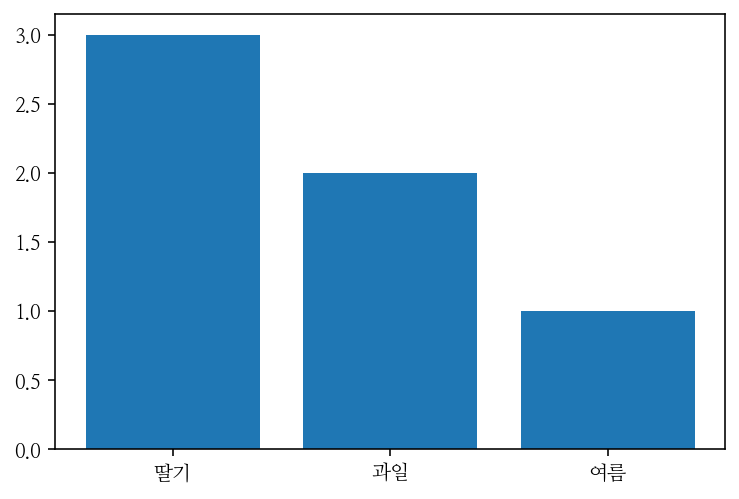

In [ ]:
wordInfo_sample = Counter({'여름':1, '과일':2, '딸기':3})
sorted_keys_sample = sorted(wordInfo_sample, key=wordInfo_sample.get, reverse=True)
sorted_values_sample = sorted(wordInfo_sample.values(), reverse=True)

import matplotlib.pyplot as plt
plt.bar(range(len(wordInfo_sample)), sorted_values_sample)
plt.xticks(range(len(wordInfo_sample)), sorted_keys_sample)
plt.show()

## 그래프 그리기

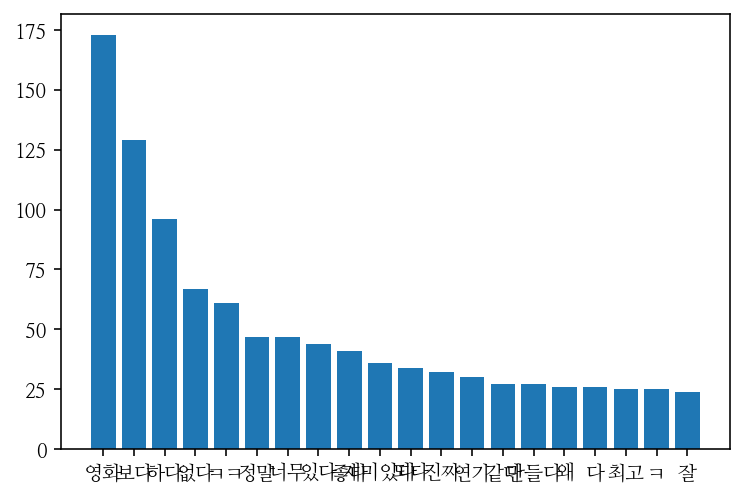

In [ ]:
# 앞에서 20개까지만 출력
sorted_keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
sorted_values = sorted(wordInfo.values(), reverse=True)

import matplotlib.pyplot as plt
plt.bar(range(20), sorted_values[:20])
plt.xticks(range(20), sorted_keys[:20])
plt.show()

고빈도 저빈도의 데이터는 감정 분석 등에 쓰이기 어렵기 때문에

 중간 정도의 빈도가 가장 좋은 데이터라고 할 수 있다.

## 전체 데이터 그래프

데이터가 너무 많아서 보기 너무 힘들고 그리는데도 오래 걸림


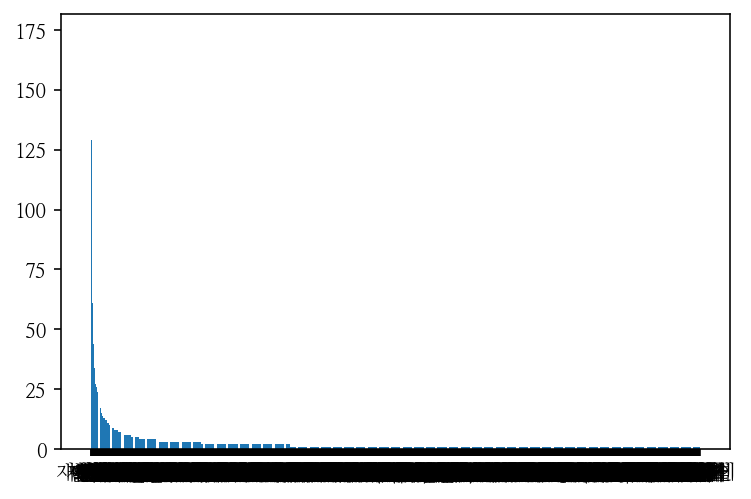

In [ ]:
sorted_keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
sorted_values = sorted(wordInfo.values(), reverse=True)

import matplotlib.pyplot as plt
plt.bar(range(len(wordInfo)), sorted_values)
plt.xticks(range(len(wordInfo)), sorted_keys)
plt.show()

# Word Cloud

In [ ]:
# data_text는 각 문장을 리스트 원소로 담고 있다.
# 각 문장 리스트 원소는 공백으로 분리되어 있다. 각 문장을 "".join으로 연결한다.

print(data_text)

['어리다 때 보다 지금 다시 보다 재미있다 ㅋㅋ', '디자인 배우다 학생 외국 디자이너 일구다 전통 통하다 발전 문화 산업 부럽다 사실 우리나라 그 어렵다 시절 끝 열정 지키다 노라노 같다 전통 있다 같다 사람 꿈 꾸다 이루다 나가다 있다 감사', '폴리스스토리 시리즈 뉴 없다 최고', '와 연기 진짜 쩔다 지루 생각하다 몰입 그래 이런 진짜 영화', '안개 자욱 하다 밤하늘 뜨다 초승달 같다 영화', '사랑 해보다 사람 처음 끝 웃다 있다 영화', '완전 감동 다시다 감동', '개들 전쟁 나오다 나오다 1빠 보다', '굿', '바보 병', '나이 같다 영화 지금 보다 감동적 하지만 훗날 다시 보다 대사 하나하나 그 감정 완벽 하다 이해하다 같다', '재미있다', '고질라 무 귀엽다 ㅋㅋ', '영화 오페라 작품 극단적 평 갈리다 어쩌다 없다', '반전 좋다 ^^', '평점 왜 낮다 긴장감 스릴감 진짜 최고 진짜 전장 느끼다 공포 생생 전하다', '네고시에이터 소재 같다 아무런 관련 없다', '단연 최고', '가다 갈수록 더욱 빠지다 밀회 화이팅', '어 생각 없이 보다 상당 하다 수작 일본 영화 최고 마음 강렬 임팩트 일품', '오랜만 보다 제대로 되다 범죄 스릴러', '그런 때가다 있다 사랑하다 도 그저 좋아하다 마디 말 꺼내다 벅차다 밤 잠 설치다 때 교복 남다 션 자 볼펜 자국 역시 미처 다 전하다 못하다 마음 형태', '마지막 씬 잊다 없다', '강압적 용서 세뇌 용서 대하다 비판', '중세 시대 명작 굿 평점 왜 이러하다', '시간 영상 존재 죽기 전 꼭 한번 보다 아름답다 슬프다 제니퍼 코넬리 눈부시다 아역 시절 로버트 드니로 마지막 웃다 장면 정말 가슴속 영원히 기억 되다 최고 명작', '사람 어떻하다 저런 짓 하다 있다 는지 ㅡㅡ 보다 다 화나다', '인간 잠재 되다 악마 여러 시간 공간 속 존속 이 다큐 엉뚱 광적 재현', '최고 일 동안 쉬다 틈틈이 잠 줄이다 여운 남다', '실화 더욱 충격 다시 일어나다 서다 안되다 경각심 일깨우다 영화'

In [ ]:
# word colud 패키지 설치
!pip install wordcloud

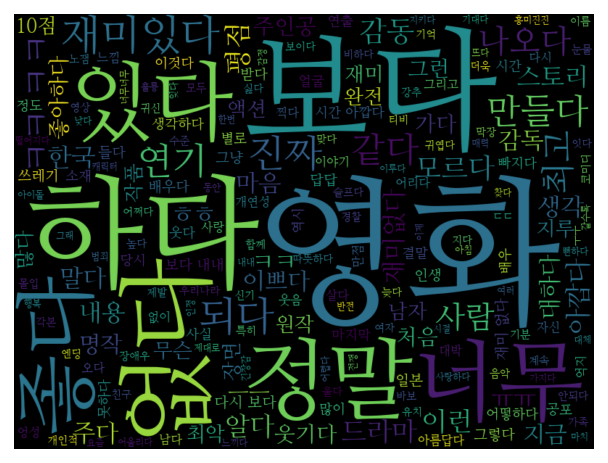

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(font_path=fontpath, width=800, height=600).generate(" ".join(data_text))
plt.imshow(cloud, interpolation='bilinear') # 글자가 더 부드럽게 나오게 한다.
plt.axis('off')
plt.show()

## Word Cloud with mask

워드 크라욷에 마스크를 적용해본다.

In [ ]:
# 먼저, mask 파일이 있는 경로를 확보한다.
import os
d = os.getcwd()
print(d)

/content/gdrive/My Drive/BigLeaderAI/자연어처리/pytest


In [ ]:
# alice.png를 RGB 값으로 읽기
import numpy as np
from PIL import Image
from os import path

alice_mask = np.array(Image.open(path.join(d, "alice.png")))

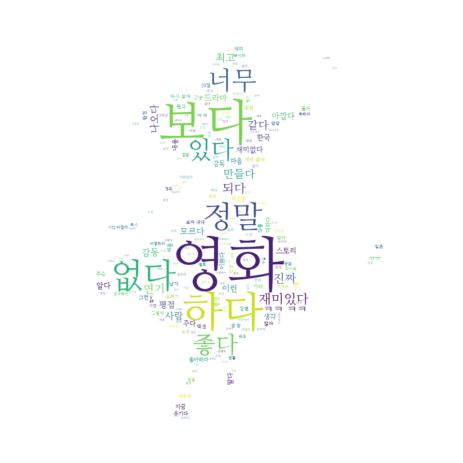

In [ ]:
# 워드 클라우드에 mask 적용
cloud = WordCloud(font_path=fontpath, width=800, height=600, background_color='white',
                  mask=alice_mask).generate(" ".join(data_text))

plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 연습문제

pytest 폴더에 있는 윤동주와 김소월의 시를 빈도분석하여 사용한 단어들의 종류에 어떠한 차이가 있는지 살펴보시오

* 다음과 같이 단어의 비율이 계산되어 나오도록 하시오.


    김소월 단어빈도 총합 : 730
    김소월 고빈도 단어 : ['가다', '잊다', '살다', ...]
    김소월 고빈도 단어비율 : [2.88, 2.33, 2.05, ...]

   
    윤동주 단어빈도 총합 : 326
    윤동주 고빈도 단어 : ['내일', '하다', '사나이', ...]
    윤동주 고빈도 단어비율 : [2.45, 2.45, 1.84, ...]

In [ ]:
def morphed_data_poem(filename) :
  # 데이터 읽기
  data = read_data(filename+'.txt', encoding='utf8', start_line=0)

  # 형태소 분석된 문장 샘플 만들기
  morphed_data = ''
  for data_each in data :
    morphed_data_each = rhinoMorph.onlyMorph_list(
        rn, data_each[0], pos = ['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
    joined_data_each = ' '.join(morphed_data_each)
    if joined_data_each :
      morphed_data += joined_data_each+'\n'

  data_text = morphed_data.split('\n')

  # Counter로 빈도 수 구하기
  mergedText = ' '.join(data_text)
  mergedTextList = mergedText.split(' ')
  wordInfo = Counter(mergedTextList)

  # 값 정렬
  sorted_keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
  sorted_values = sorted(wordInfo.values(), reverse=True)

  #Word Cloud 생성
  from wordcloud import WordCloud
  cloud = WordCloud(font_path=fontpath, width=800, height=800, background_color='white').generate(" ".join(data_text))

  # numpy float 출력옵션 변경
  print(filename+' 단워빈도 총합\t:', sum(sorted_values))
  print(filename+' 고빈도 단어\t:', sorted_keys)
  print(filename+' 고빈도 단어비율:', ((np.array(sorted_values)/sum(sorted_values))*100).tolist())

  
  import matplotlib.pyplot as plt

  # 최대 20개 시각화
  plt.subplot(121)
  plt.bar(range(20), sorted_values[:20])
  plt.xticks(range(20), sorted_keys[:20])

  # word cloud 시각화
  plt.subplot(122)
  plt.imshow(cloud, interpolation='bilinear')
  plt.axis('off')

  plt.show()
  print('\n')

김소월시 단워빈도 총합	: 732
김소월시 고빈도 단어	: ['가다', '잊다', '살다', '하다', '못', '울다', '그립다', '죽다', '꽃', '멀다', '길', '밤', '오다', '이', '저', '들다', '되다', '모르다', '피다', '그', '이름', '넘다', '저녁', '부르다', '말', '새다', '눈', '산', '예전', '미처', '봄', '노래', '사람', '생각', '있다', '삭주', '구성', '물', '곳', '접동', '누나', '불귀', '달이다', '보다', '없다', '꽃잎', '때', '사랑하다', '날', '몸', '집', '진두', '강', '오늘', '위', '다시', '없이', '베개', '잠', '서다', '흰눈', '여울', '가마귀', '공중', '가시다', '지네', '부르노', '그런대로', '사노', '잊히다', '그러나', '또', '사흘', '삼천리', '히', '젖다', '걸리다', '높다', '꿈', '다', '길이', '접동새', '가람', '남다', '슬피', '훗날', '그때', '나무라다', '그래도', '어제', '오리나무', '내리다', '삼수갑산', '돋다', '설움', '창', '아롱아롱', '비치다', '눈물', '동달이', '사랑', '바다', '변', '뽕나무', '밭', '붉은', '귀', '들려오다', '잠들다', '깊이', '홀로', '남김없이', '퍼붓다', '개', '나오다', '아주', '앉다', '왁', '여', '기러기', '진달래꽃', '역겹다', '걸음', '여름', '서산', '설', '겹다', '강물', '흐르다', '따르다', '김', '소', '월', '한세상', '지내다', '세월', '라', '한끝', '이렇다', '살뜰히', '어쩌면', '뜨다', '지나다', '배', '더더구나', '걷다', '요', '맞다', '함빡', '제비', '비', '오노', '가끔가끔', '돌아오다', '서로', '떠나다', '둔', '새들', '남북

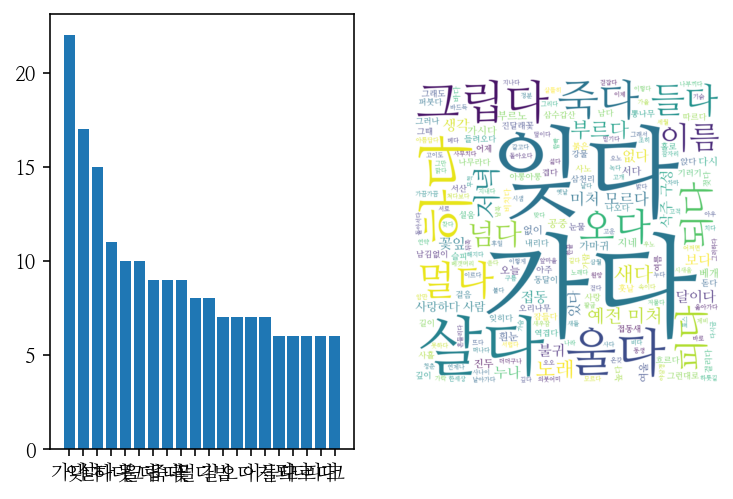



윤동주시 단워빈도 총합	: 327
윤동주시 고빈도 단어	: ['하다', '내일', '사나이', '그', '없다', '오늘', '길', '다', '남다', '어느', '돌아가다', '밤', '속', '까닭', '이', '되다', '새롭다', '가다', '아우', '바람', '봄', '발자취', '소리', '듣다', '있다', '별', '헤다', '지나가다', '하늘', '가을', '아무', '없이', '시', '슬프다', '병', '모르다', '지나치다', '얼굴', '참회록', '주다', '즐겁다', '시내', '돌', '언덕', '사랑', '기차다', '그립다', '쌓다', '층', '밉다', '생각', '묻다', '동트다', '때', '새날', '찾다', '잠', '돌보다', '그때', '동무', '희다', '그림자', '황혼', '짙다', '모금', '하루', '종일', '시들다', '귀', '가만히', '기울이다', '땅거미', '옮기다', '총명', '계절', '가득', '차', '걱정', '속의', '헤이다', '가슴', '새기다', '이제', '못', '쉬이', '아침', '오다', '아직', '청춘', '쉽다', '씌다', '여진', '창밖', '밤비', '속살거리다', '육첩방', '남', '나라', '시인', '천명인', '알다', '적다', '병원', '늙다', '의사', '젊은이', '시련', '피로', '성내다', '서다', '안', '내', '건너서다', '숲', '고개', '넘다', '마을', '어제', '인상화', '붉은', '이마', '싸늘', '달이다', '서리다', '그림', '발걸음', '멈추다', '살그머니', '앳되다', '손', '잡다', '자다', '되려', '사람', '진정코', '대답', '불다', '불어오다', '불리다', '부', '괴로움', '이유', '파란', '녹이다', '끼이다', '구리거울', '왕조', '유물', '이다지', '욕', '참회', '글', '줄이다', '만', '무슨', '기쁨', 

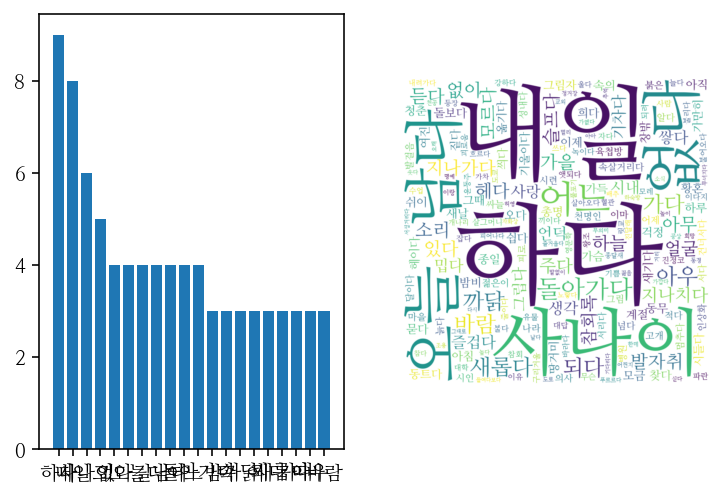

In [ ]:
poem_name = ['김소월시', '윤동주시']
for poem in poem_name :
  morphed_data_poem(poem)